In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
dataset = pd.read_csv('PH-Sales.csv')

In [35]:
dataset.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [36]:
dates = pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

In [37]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [38]:
dataset['month'] = dates.month
dataset['year'] = dates.year

In [39]:
dataset.head(12)

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
5,Jun-03,189,6,2003
6,Jul-03,207,7,2003
7,Aug-03,207,8,2003
8,Sep-03,171,9,2003
9,Oct-03,150,10,2003


In [40]:
import calendar 
dataset['month'] = dataset['month'].apply(lambda x:calendar.month_abbr[x])
dataset['month'].head(12)

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: month, dtype: object

In [41]:
dataset.drop(['Month-Year'],axis=1,inplace=True)

In [42]:
dataset.head()

,Number of Tractor Sold,month,year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [43]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [44]:
dataset.head()

,Tractor-Sales,month,year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [45]:
dataset.set_index(dates,inplace=True)

In [46]:
dataset.head()

,Tractor-Sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [47]:
dataset = dataset[['month','year','Tractor-Sales']]

In [48]:
dataset.head()

,month,year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [49]:
sales_ts = dataset['Tractor-Sales']


In [50]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'year')

Text(0, 0.5, 'no of tractor sale')

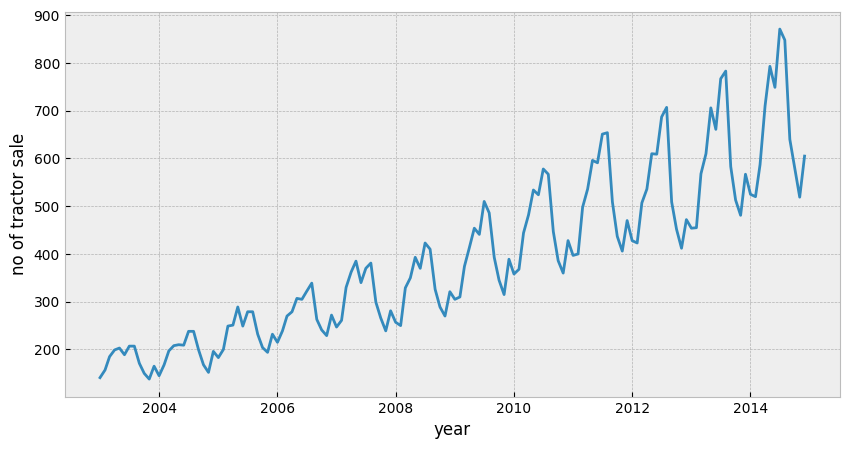

In [51]:
%matplotlib inline 
plt.style.use('bmh')
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel("year")
plt.ylabel("no of tractor sale")

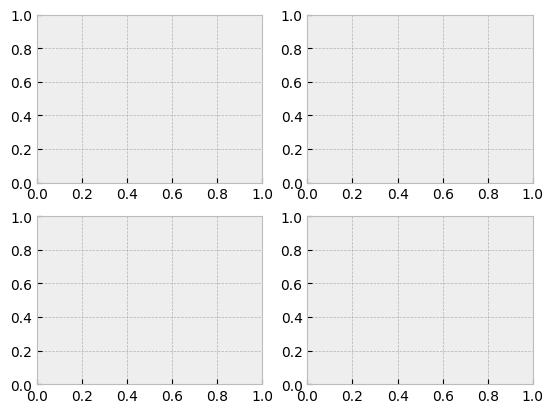

In [52]:
fig, axes= plt.subplots(2,2,sharey=False,sharex=False)


In [53]:
sales_ts.rolling(window=2)

Rolling [window=2,center=False,axis=0,method=single]

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '4-Months Moving Average')

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '6-Months Moving Average')

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '8-Months Moving Average')

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '12-Months Moving Average')

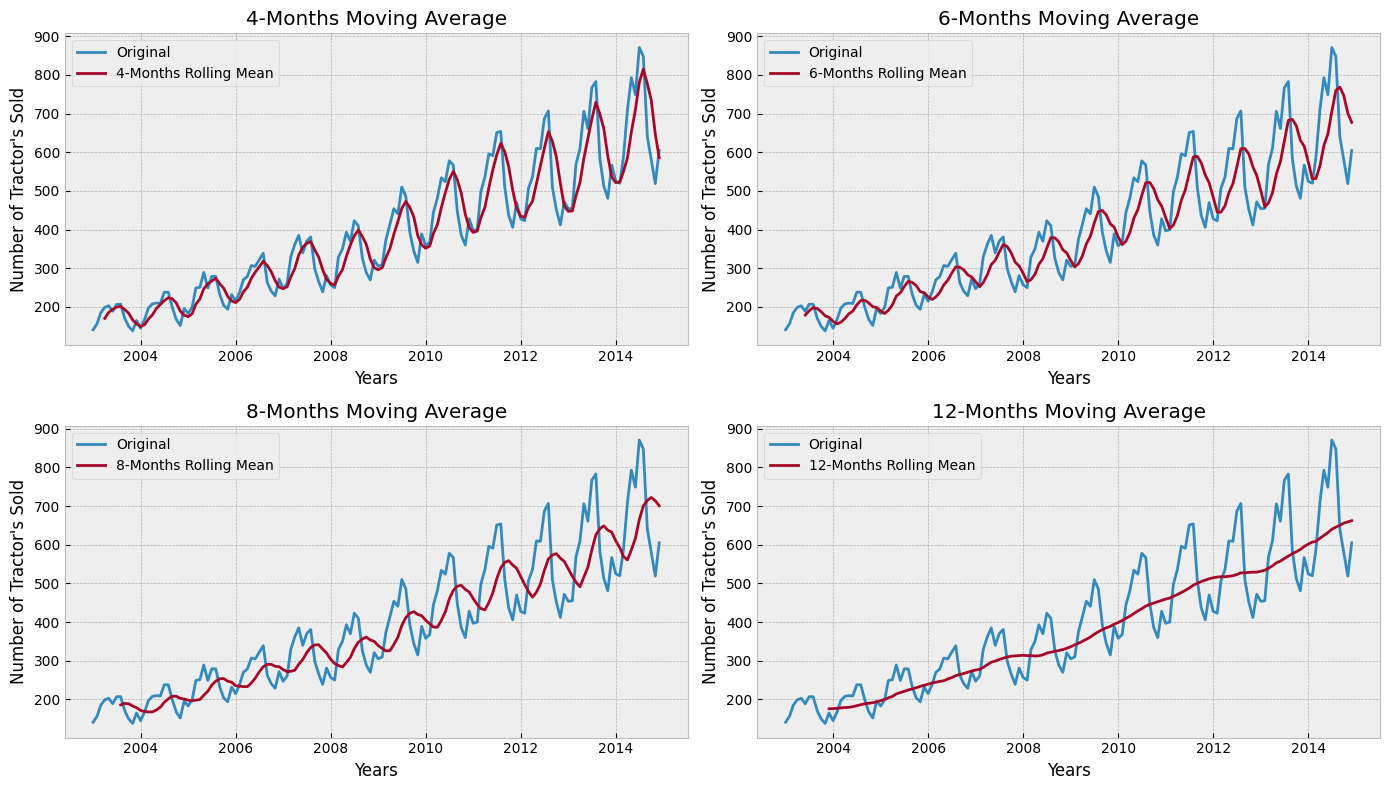

In [56]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [59]:
##rolling mean and std on 12 month window
rolmean = sales_ts.rolling(window=12).mean()
rolestd = sales_ts.rolling(window=12).std()

Text(0.5, 1.0, 'rolling mean and std')

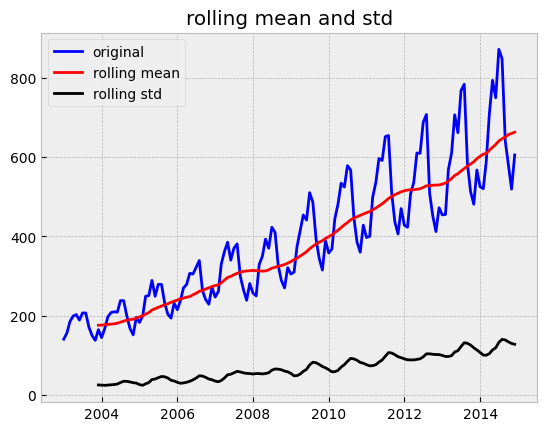

In [60]:
plt.plot(sales_ts,color='blue',label='original')
plt.plot(rolmean,color='red',label='rolling mean')
plt.plot(rolestd,color='black',label='rolling std')
plt.title('rolling mean and std')
plt.legend(loc='best')
plt.show(block=True)

In [61]:
## let do dickey fuller test

In [62]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sales_ts)
dftest

(1.1088250591467372,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [63]:
dfoutput=pd.Series(dftest[0:4],index=['statical value','p-value','#lags','number of obervation'])

In [64]:
dfoutput

statical value            1.108825
p-value                   0.995291
#lags                    14.000000
number of obervation    129.000000
dtype: float64

## Not stationary 

In [65]:
for key,value in dftest[4].items():
    dfoutput[key] = value

print(dfoutput)

statical value            1.108825
p-value                   0.995291
#lags                    14.000000
number of obervation    129.000000
1%                       -3.482088
5%                       -2.884219
10%                      -2.578864
dtype: float64


In [66]:
dfoutput['sunny'] = 24
dfoutput

statical value            1.108825
p-value                   0.995291
#lags                    14.000000
number of obervation    129.000000
1%                       -3.482088
5%                       -2.884219
10%                      -2.578864
sunny                    24.000000
dtype: float64

In [67]:
dataset.head()

,month,year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [68]:
pd.pivot(dataset,values="Tractor-Sales",index='month',columns='year').head()

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525


In [69]:
pd.pivot(dataset,values="Tractor-Sales",index='year',columns='month').head()

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299


In [73]:
monthly_dataset=pd.pivot(dataset,values='Tractor-Sales',index='month',columns='year')

In [74]:
monthly_dataset = monthly_dataset.reindex(index=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [77]:
monthly_dataset

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<Axes: xlabel='month'>

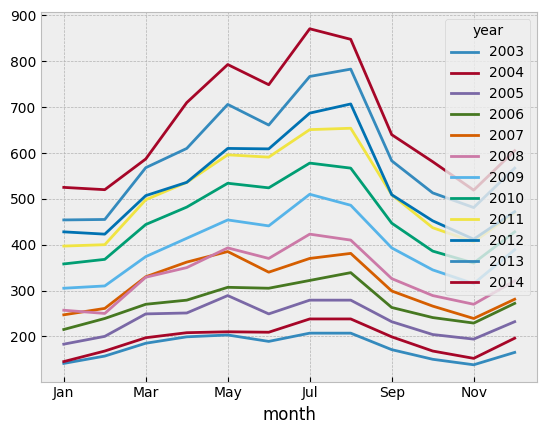

In [78]:
monthly_dataset.plot()

In [79]:
monthly_dataset

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


In [80]:
yearly_dataset=pd.pivot(dataset,values='Tractor-Sales',index='year',columns='month')

In [81]:
yearly_dataset[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<Axes: xlabel='year'>

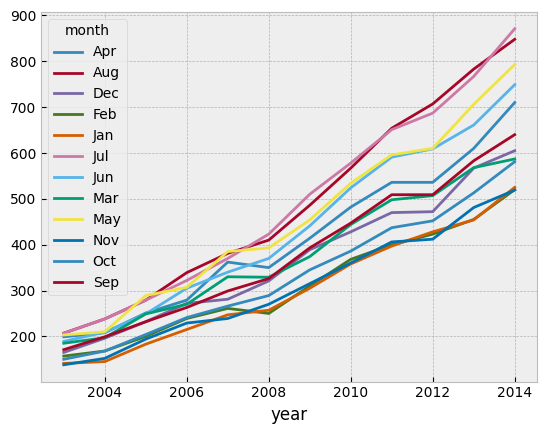

In [82]:
yearly_dataset.plot()

<Axes: >

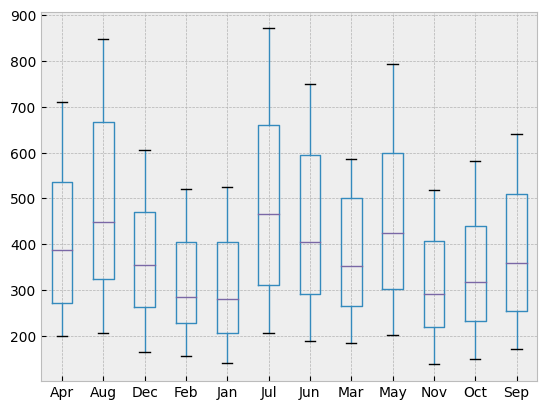

In [83]:
yearly_dataset.boxplot()

<Axes: >

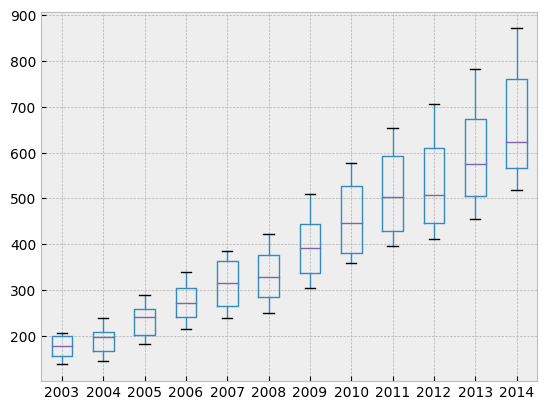

In [84]:
monthly_dataset.boxplot()

In [85]:
# PH Trantor Irregular Remainder

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_ts,model='multiplicative')

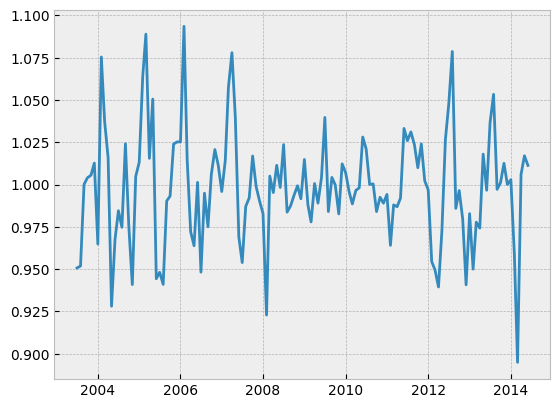

In [87]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.plot(residual)

Text(0.5, 0.98, 'Decomposition of multiplicative time series')

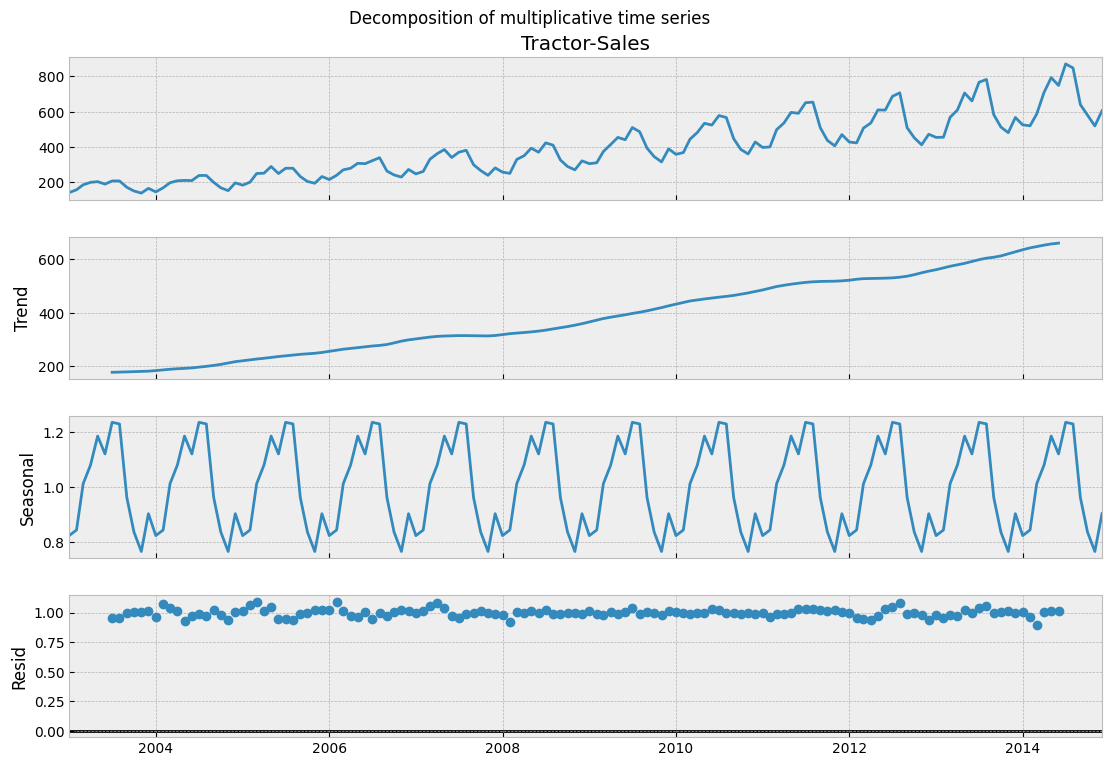

In [88]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [89]:
sales_ts.diff(periods=1).head(10)

2003-01-01     NaN
2003-02-01    16.0
2003-03-01    28.0
2003-04-01    14.0
2003-05-01     4.0
2003-06-01   -14.0
2003-07-01    18.0
2003-08-01     0.0
2003-09-01   -36.0
2003-10-01   -21.0
Freq: MS, Name: Tractor-Sales, dtype: float64

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

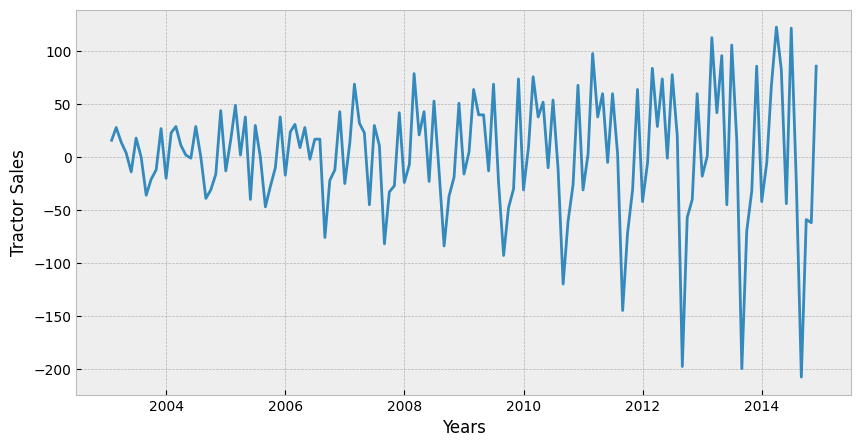

In [90]:
# Step 2: Difference data to make data stationary on mean (remove trend)

plt.figure(figsize=(10,5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel("Years")
plt.ylabel("Tractor Sales")

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

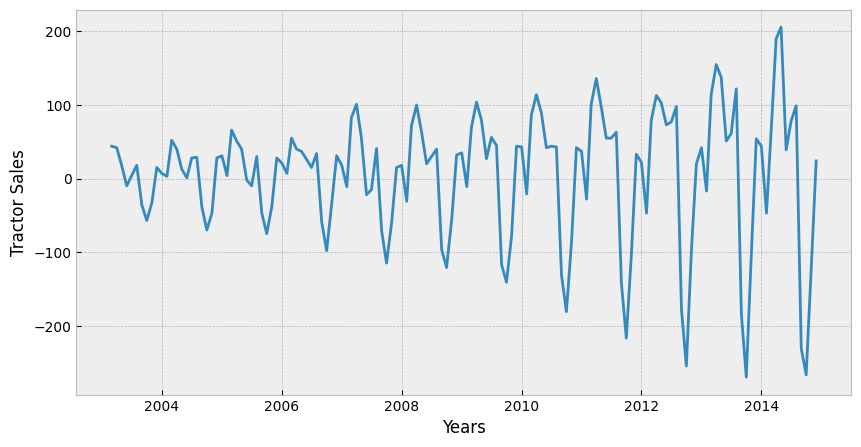

In [96]:
## period 2

plt.figure(figsize=(10,5))
plt.plot(sales_ts.diff(periods=2))
plt.xlabel("Years")
plt.ylabel("Tractor Sales")

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tranctor Sales')

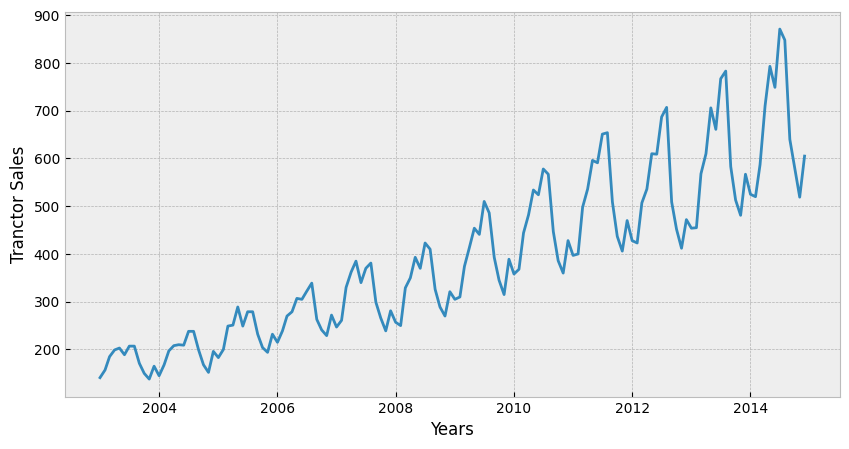

In [97]:
##original 
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel("Years")
plt.ylabel("Tranctor Sales")

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Log (Tractor sales)')

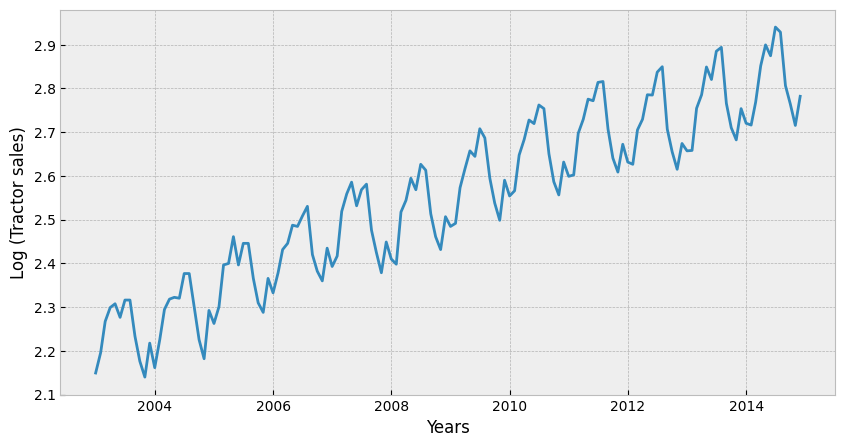

In [98]:
## applying log transform

plt.figure(figsize=(10,5))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor sales)')


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

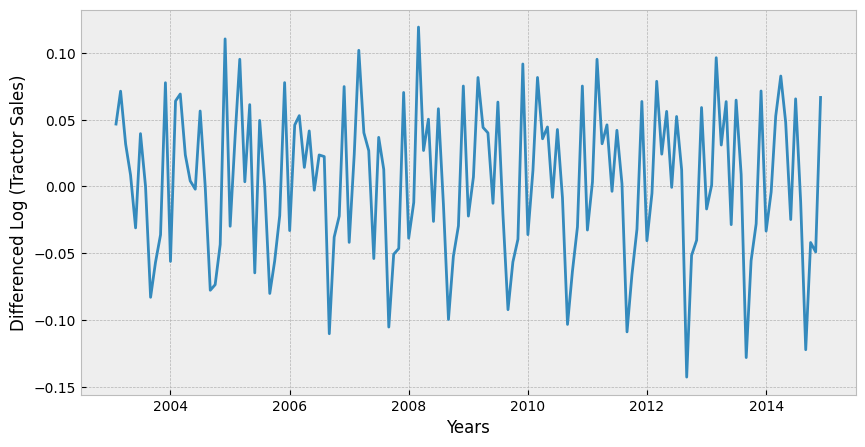

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [104]:
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [106]:
sales_ts_log = np.log10(sales_ts)
len(sales_ts_log)
sales_ts_log.dropna(inplace=True)
len(sales_ts_log)

144

144

In [109]:
import statsmodels.tsa.api as smt
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)
sales_ts_log.head(5)

2003-01-01    2.149219
2003-02-01    2.195900
2003-03-01    2.267172
2003-04-01    2.298853
2003-05-01    2.307496
Freq: MS, Name: Tractor-Sales, dtype: float64

In [110]:
sales_ts_log_diff = sales_ts_log.diff(periods=1)
sales_ts_log_diff.dropna(inplace=True)

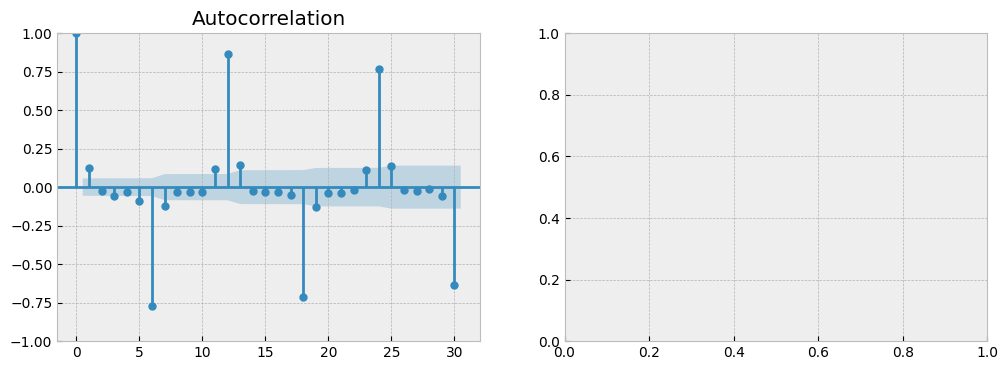

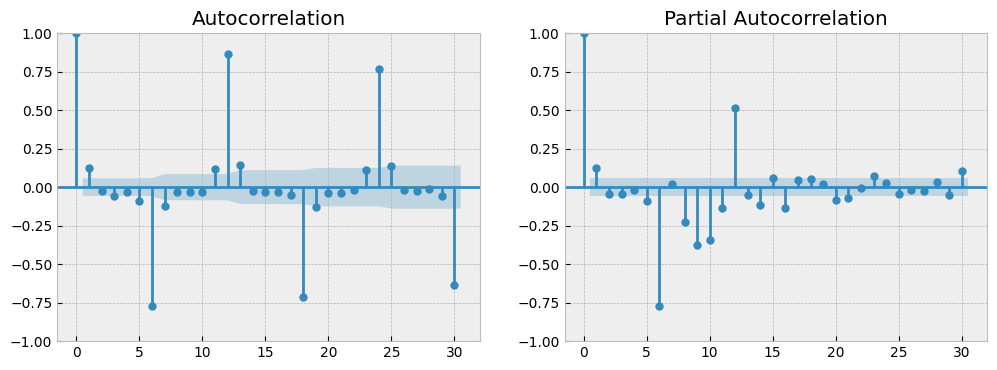

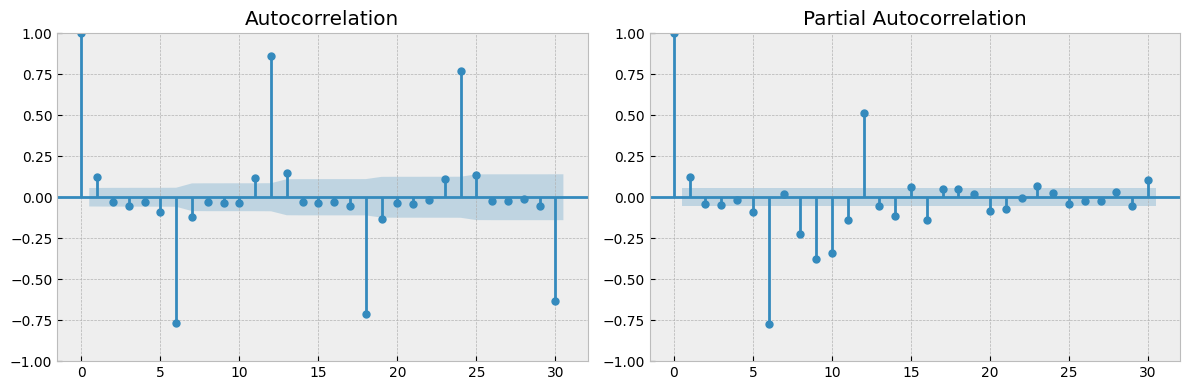

In [111]:
fig,axes = plt.subplots(1,2,sharey=False,sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()


In [112]:
p=d=q=range(0, 2)


In [113]:
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [117]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [118]:
# Step 6: Identification of best fit ARIMA model
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [119]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [120]:
temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = (0, 0, 1),
                                             seasonal_order =(0, 1, 0, 12),
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            

In [121]:
results = temp_model.fit()

In [122]:
results.aic

-479.05651401834274

In [124]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-733.7743753656857


In [125]:
p = d = q = range(0, 2)

In [126]:
print(list(p))

[0, 1]


In [127]:
pdq = list(itertools.product(p, d, q))


In [128]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [129]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [130]:
#AIC & BIC 
blog_param_order = (0, 1, 1)
blog_param_seasonal_order = (0, 1, 1, 12)
blog_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=blog_param_order,
                                      seasonal_order=blog_param_seasonal_order,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
blog_results = blog_model.fit()
print("Blog SARIMAX{}x{}12 model - AIC:{}".format(blog_param_order, blog_param_seasonal_order, blog_results.aic))


Blog SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-702.7856781995399


In [132]:
# Step 7: Predict sales on in-sample date using the best fit ARIMA model
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
print(best_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 370.887
Date:                            Thu, 22 Jun 2023   AIC                           -733.774
Time:                                    13:01:58   BIC                           -721.923
Sample:                                01-01-2003   HQIC                          -728.959
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3572      0.069     -5.194      0.000      -0.492      -0.222
ar.S.L12       0.9932      0.006   

In [133]:
print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3572      0.069     -5.194      0.000      -0.492      -0.222
ar.S.L12       0.9932      0.006    175.408      0.000       0.982       1.004
ma.S.L12      -0.5529      0.097     -5.725      0.000      -0.742      -0.364
sigma2         0.0003   2.74e-05      9.217      0.000       0.000       0.000


In [134]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [135]:
pred_dynamic

In [137]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [138]:
pred_dynamic

In [139]:
len(pred_dynamic.predicted_mean)

36

In [140]:
sales_ts_truth = sales_ts_log['2012-01-01':]

In [141]:
sales_ts_truth

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
2012-06-01    2.784617
2012-07-01    2.836957
2012-08-01    2.849419
2012-09-01    2.706718
2012-10-01    2.655138
2012-11-01    2.614897
2012-12-01    2.673942
2013-01-01    2.657056
2013-02-01    2.658011
2013-03-01    2.754348
2013-04-01    2.785330
2013-05-01    2.848805
2013-06-01    2.820201
2013-07-01    2.884795
2013-08-01    2.893762
2013-09-01    2.765669
2013-10-01    2.710117
2013-11-01    2.682145
2013-12-01    2.753583
2014-01-01    2.720159
2014-02-01    2.716003
2014-03-01    2.768638
2014-04-01    2.851258
2014-05-01    2.899273
2014-06-01    2.874482
2014-07-01    2.940018
2014-08-01    2.928396
2014-09-01    2.806180
2014-10-01    2.764176
2014-11-01    2.715167
2014-12-01    2.781755
Freq: MS, Name: Tractor-Sales, dtype: float64

In [142]:
pred_dynamic.predicted_mean

2012-01-01    2.645106
2012-02-01    2.652872
2012-03-01    2.742180
2012-04-01    2.775290
2012-05-01    2.818523
2012-06-01    2.807908
2012-07-01    2.853016
2012-08-01    2.849076
2012-09-01    2.747065
2012-10-01    2.686213
2012-11-01    2.653954
2012-12-01    2.725204
2013-01-01    2.695273
2013-02-01    2.702987
2013-03-01    2.791692
2013-04-01    2.824578
2013-05-01    2.867520
2013-06-01    2.856977
2013-07-01    2.901780
2013-08-01    2.897867
2013-09-01    2.796544
2013-10-01    2.736103
2013-11-01    2.704062
2013-12-01    2.774831
2014-01-01    2.745102
2014-02-01    2.752764
2014-03-01    2.840869
2014-04-01    2.873534
2014-05-01    2.916185
2014-06-01    2.905713
2014-07-01    2.950215
2014-08-01    2.946327
2014-09-01    2.845689
2014-10-01    2.785656
2014-11-01    2.753831
2014-12-01    2.824122
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: >

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

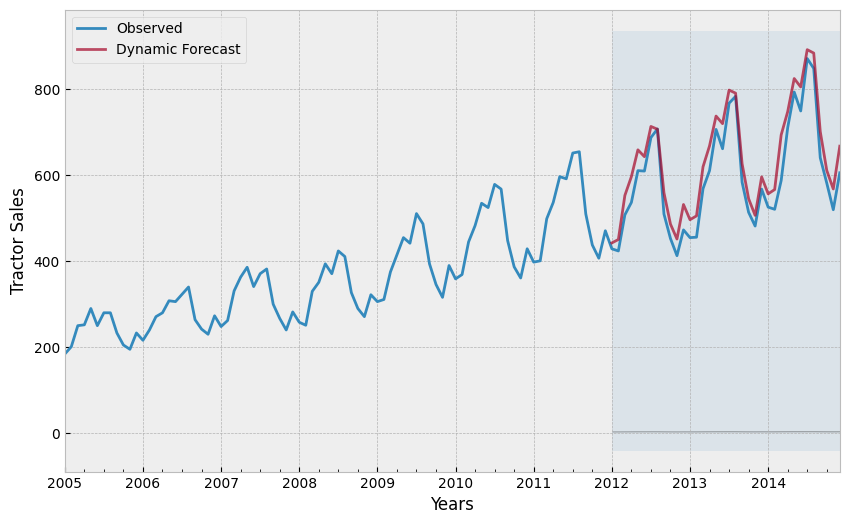

In [143]:
# The Mean Squared Error of our forecasts is 0.0011
axis = sales_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [146]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [147]:
pred_dynamic

In [148]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [150]:
pred_dynamic_ci

,lower Tractor-Sales,upper Tractor-Sales
2012-01-01,2.613977,2.676235
2012-02-01,2.615868,2.689877
2012-03-01,2.700112,2.784248
2012-04-01,2.728706,2.821873
2012-05-01,2.767824,2.869222
2012-06-01,2.753404,2.862413
2012-07-01,2.794956,2.911077
2012-08-01,2.787664,2.910488
2012-09-01,2.682476,2.811654
2012-10-01,2.618596,2.753830


In [151]:
len(pred_dynamic.predicted_mean)

36

In [152]:
sales_ts_truth = sales_ts_log['2012-01-01':]

In [153]:
sales_ts_truth

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
2012-06-01    2.784617
2012-07-01    2.836957
2012-08-01    2.849419
2012-09-01    2.706718
2012-10-01    2.655138
2012-11-01    2.614897
2012-12-01    2.673942
2013-01-01    2.657056
2013-02-01    2.658011
2013-03-01    2.754348
2013-04-01    2.785330
2013-05-01    2.848805
2013-06-01    2.820201
2013-07-01    2.884795
2013-08-01    2.893762
2013-09-01    2.765669
2013-10-01    2.710117
2013-11-01    2.682145
2013-12-01    2.753583
2014-01-01    2.720159
2014-02-01    2.716003
2014-03-01    2.768638
2014-04-01    2.851258
2014-05-01    2.899273
2014-06-01    2.874482
2014-07-01    2.940018
2014-08-01    2.928396
2014-09-01    2.806180
2014-10-01    2.764176
2014-11-01    2.715167
2014-12-01    2.781755
Freq: MS, Name: Tractor-Sales, dtype: float64

In [154]:
list(pred_dynamic)

TypeError: 'PredictionResultsWrapper' object is not iterable

In [157]:
sales_ts_forecasted = pred_dynamic.predicted_mean

In [158]:
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()

In [159]:
mse

0.0010756002726706965

In [160]:
sales_ts_forecasted

2012-01-01    2.645106
2012-02-01    2.652872
2012-03-01    2.742180
2012-04-01    2.775290
2012-05-01    2.818523
2012-06-01    2.807908
2012-07-01    2.853016
2012-08-01    2.849076
2012-09-01    2.747065
2012-10-01    2.686213
2012-11-01    2.653954
2012-12-01    2.725204
2013-01-01    2.695273
2013-02-01    2.702987
2013-03-01    2.791692
2013-04-01    2.824578
2013-05-01    2.867520
2013-06-01    2.856977
2013-07-01    2.901780
2013-08-01    2.897867
2013-09-01    2.796544
2013-10-01    2.736103
2013-11-01    2.704062
2013-12-01    2.774831
2014-01-01    2.745102
2014-02-01    2.752764
2014-03-01    2.840869
2014-04-01    2.873534
2014-05-01    2.916185
2014-06-01    2.905713
2014-07-01    2.950215
2014-08-01    2.946327
2014-09-01    2.845689
2014-10-01    2.785656
2014-11-01    2.753831
2014-12-01    2.824122
Freq: MS, Name: predicted_mean, dtype: float64

In [161]:
sales_ts_truth

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
2012-06-01    2.784617
2012-07-01    2.836957
2012-08-01    2.849419
2012-09-01    2.706718
2012-10-01    2.655138
2012-11-01    2.614897
2012-12-01    2.673942
2013-01-01    2.657056
2013-02-01    2.658011
2013-03-01    2.754348
2013-04-01    2.785330
2013-05-01    2.848805
2013-06-01    2.820201
2013-07-01    2.884795
2013-08-01    2.893762
2013-09-01    2.765669
2013-10-01    2.710117
2013-11-01    2.682145
2013-12-01    2.753583
2014-01-01    2.720159
2014-02-01    2.716003
2014-03-01    2.768638
2014-04-01    2.851258
2014-05-01    2.899273
2014-06-01    2.874482
2014-07-01    2.940018
2014-08-01    2.928396
2014-09-01    2.806180
2014-10-01    2.764176
2014-11-01    2.715167
2014-12-01    2.781755
Freq: MS, Name: Tractor-Sales, dtype: float64

In [162]:
pred= best_results.get_forecast(steps=36)

In [163]:
pred.predicted_mean

2015-01-01    2.753938
2015-02-01    2.752966
2015-03-01    2.825283
2015-04-01    2.878057
2015-05-01    2.929522
2015-06-01    2.909751
2015-07-01    2.969007
2015-08-01    2.967083
2015-09-01    2.845627
2015-10-01    2.796377
2015-11-01    2.757116
2015-12-01    2.823822
2016-01-01    2.795086
2016-02-01    2.794121
2016-03-01    2.865950
2016-04-01    2.918367
2016-05-01    2.969485
2016-06-01    2.949847
2016-07-01    3.008703
2016-08-01    3.006793
2016-09-01    2.886156
2016-10-01    2.837239
2016-11-01    2.798243
2016-12-01    2.864499
2017-01-01    2.835957
2017-02-01    2.834998
2017-03-01    2.906342
2017-04-01    2.958405
2017-05-01    3.009178
2017-06-01    2.989673
2017-07-01    3.048131
2017-08-01    3.046234
2017-09-01    2.926412
2017-10-01    2.877825
2017-11-01    2.839092
2017-12-01    2.904901
Freq: MS, Name: predicted_mean, dtype: float64

In [164]:
# Step 8: Forecast sales using the best fit ARIMA model
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI


In [165]:
# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [166]:
sales_ts.index[-1]

Timestamp('2014-12-01 00:00:00')

In [167]:
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')

In [168]:
idx

DatetimeIndex(['2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [169]:
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

In [171]:
fc_95[:5]

,forecast,lower_ci_95,upper_ci_95
2014-12-01,567.463766,528.214241,609.629769
2015-01-01,566.195319,519.950851,616.552775
2015-02-01,668.779878,607.038404,736.801037
2015-03-01,755.190774,678.381006,840.697336
2015-04-01,850.202094,756.526051,955.477476


In [172]:
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [173]:
fc_99.head(5)

,lower_ci_99,upper_ci_99
2014-12-01,528.214241,609.629769
2015-01-01,519.950851,616.552775
2015-02-01,607.038404,736.801037
2015-03-01,678.381006,840.697336
2015-04-01,756.526051,955.477476


In [174]:
fc_all = fc_95.combine_first(fc_99)

In [175]:
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns

In [176]:
fc_all.head()


,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.463766,528.214241,609.629769,528.214241,609.629769
2015-01-01,566.195319,519.950851,616.552775,519.950851,616.552775
2015-02-01,668.779878,607.038404,736.801037,607.038404,736.801037
2015-03-01,755.190774,678.381006,840.697336,678.381006,840.697336
2015-04-01,850.202094,756.526051,955.477476,756.526051,955.477476


<Axes: >

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

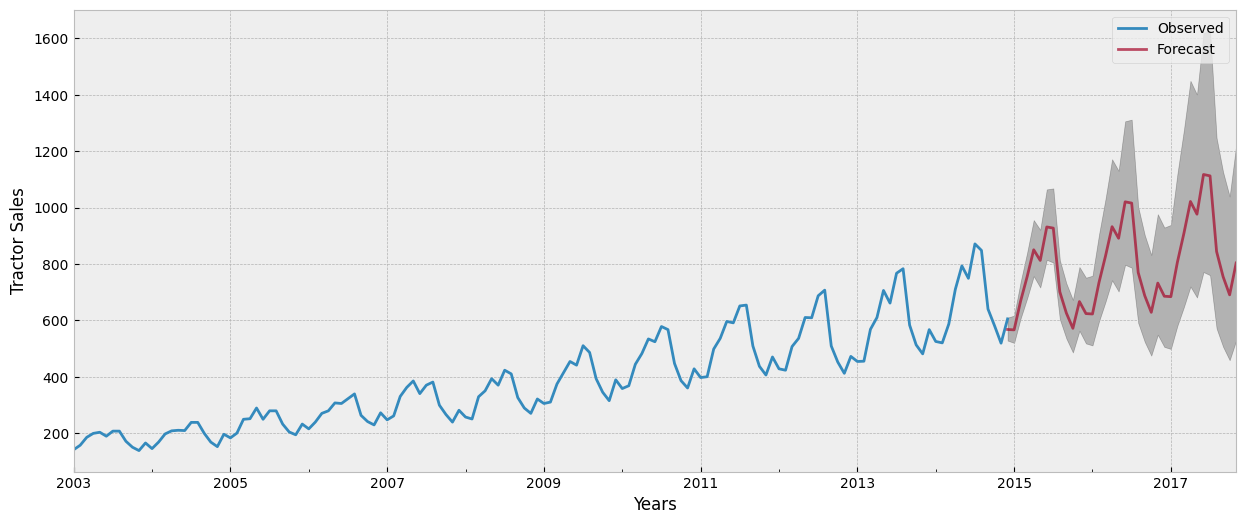

In [177]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

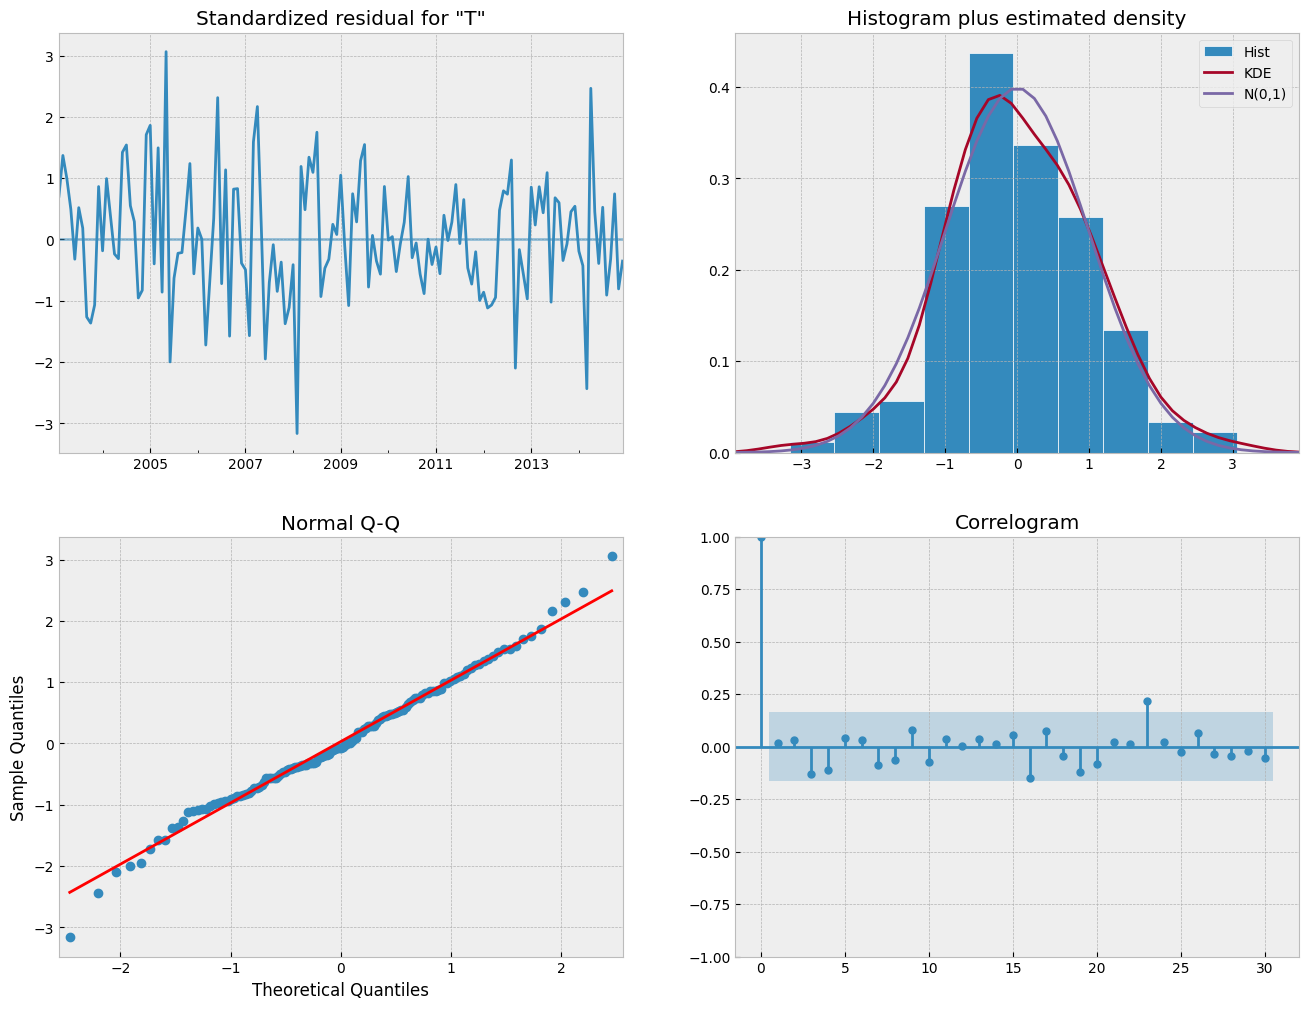

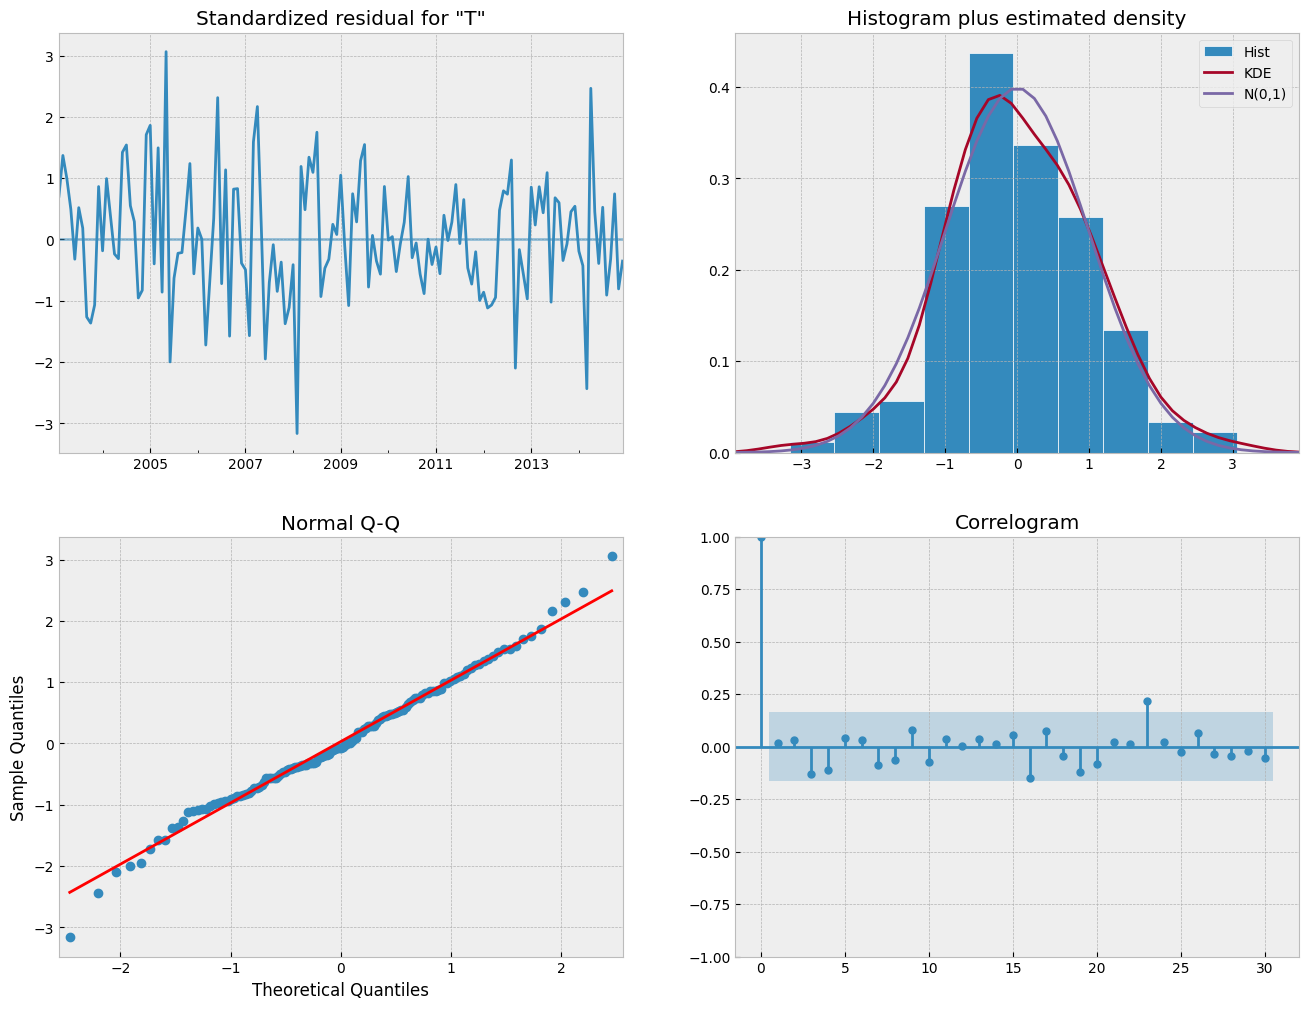

In [178]:
# Step 9: Plot ACF and PACF for residuals of ARIMA model to ensure no 
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()


In [180]:
!pip install yfinance

                                              0.0/63.2 kB ? eta -:--:--
     ---------------------------------------- 63.2/63.2 kB 3.3 MB/s eta 0:00:00
                                              0.0/3.8 MB ? eta -:--:--
     ---                                      0.3/3.8 MB 5.9 MB/s eta 0:00:01
     ---                                      0.3/3.8 MB 5.9 MB/s eta 0:00:01
     ---                                      0.3/3.8 MB 5.9 MB/s eta 0:00:01
     ---                                      0.3/3.8 MB 5.9 MB/s eta 0:00:01
     ---                                      0.3/3.8 MB 5.9 MB/s eta 0:00:01
     ----                                     0.4/3.8 MB 1.5 MB/s eta 0:00:03
     ----                                     0.4/3.8 MB 1.4 MB/s eta 0:00:03
     ------                                   0.6/3.8 MB 1.6 MB/s eta 0:00:02
     --------                                 0.8/3.8 MB 2.0 MB/s eta 0:00:02
     ----------                               1.0/3.8 MB 2.2 MB/s eta 0:00:

In [181]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Axes: xlabel='Tractor-Sales', ylabel='Density'>

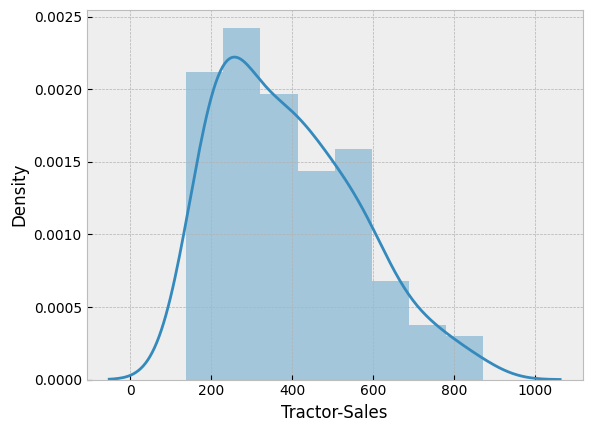

In [185]:
import seaborn as sns
sns.distplot(sales_ts)

In [186]:
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

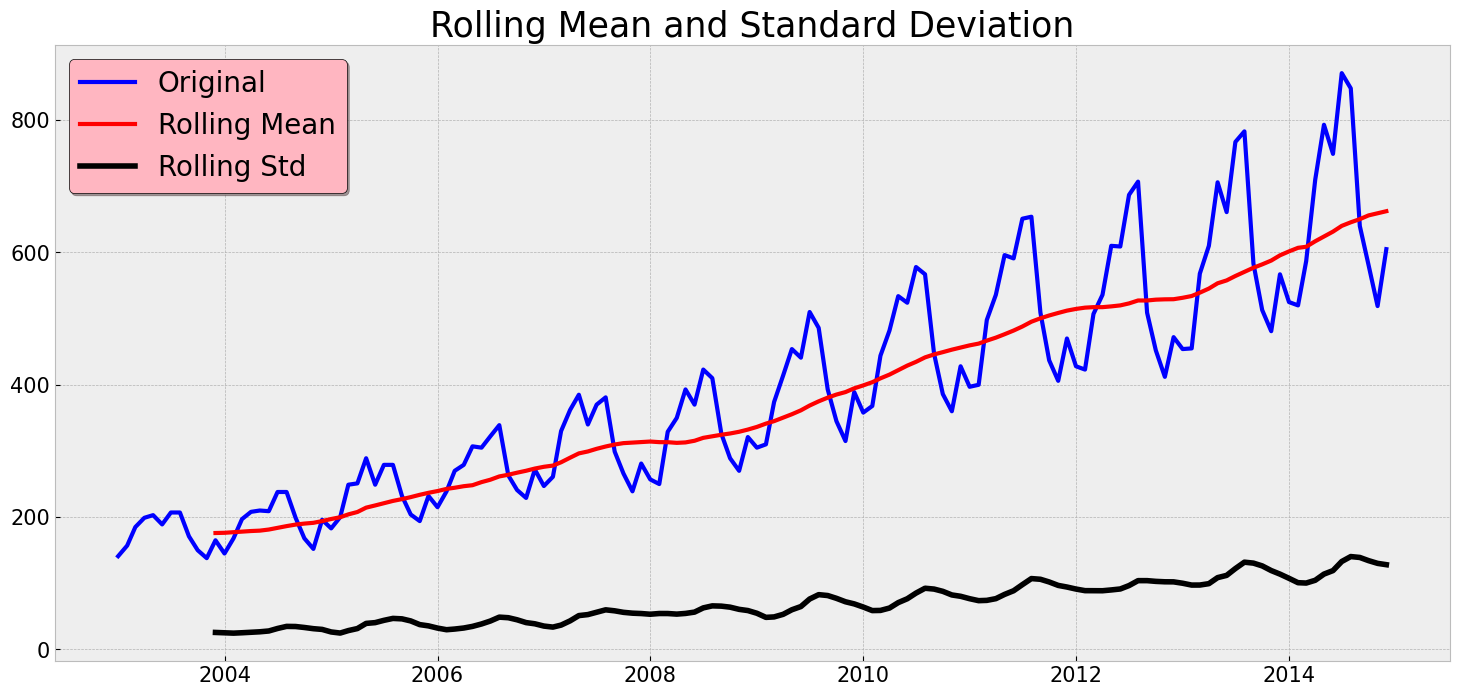

Results of dickey fuller test
Test Statistics                  1.108825
p-value                          0.995291
No. of lags used                14.000000
Number of observations used    129.000000
critical value (1%)             -3.482088
critical value (5%)             -2.884219
critical value (10%)            -2.578864
dtype: float64


In [188]:
test_stationarity(sales_ts)